# keras-nn-tutorial

Basic tutorial for training feed-forward neural networks with the Keras library. This tutorial is an extension of: https://github.com/HelgiHelgason/genetic-nn-tutorial

Dependencies are Tensorflow and Keras:

pip install tensorflow
pip install keras

Keras is a high-level deep learning library that takes care of loading Tensorflow by itself, to Tensorflow is never explicitly used in this code. Keras also works with other back-ends than Tensorflow.


In [1]:
# Note that we only have very basic dependencies
import random
import numpy as np
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense 

Using TensorFlow backend.


In [2]:
# Our dataset
dataset = []

# Where to start the X's
x_runner = -4.0
increment = 0.04

# Generate the dataset, we're going to learn the cos(x) function
for i in range(200):
    dataset.append([x_runner, math.cos(x_runner)])
    x_runner += increment

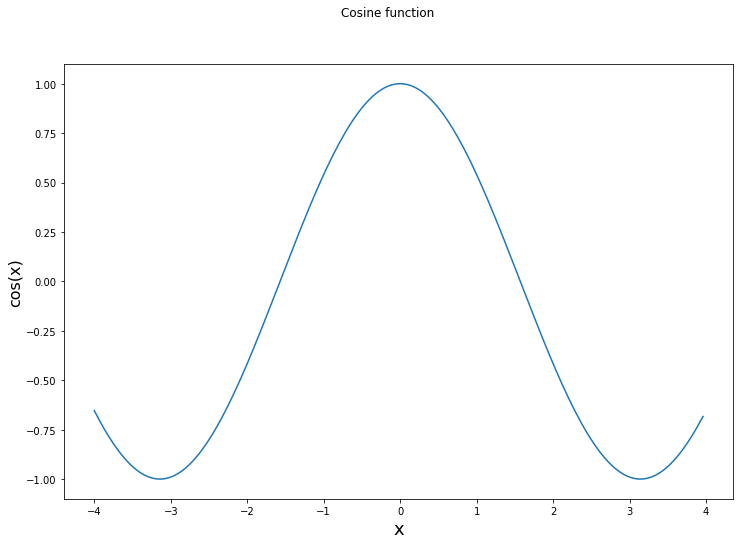

In [3]:
# Plot the whole dataset
fig = plt.figure(figsize=(12, 8))
plt.plot(list(item[0] for item in dataset), list(item[1] for item in dataset))
fig.suptitle('Cosine function')
plt.xlabel('x', fontsize=18)
plt.ylabel('cos(x)', fontsize=16)
plt.show()


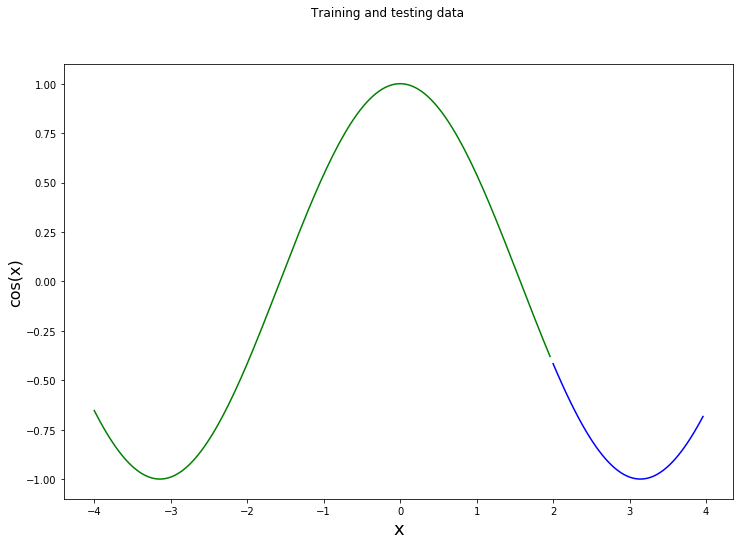

In [4]:
# Split into training and testing sets
training_dataset = dataset[:150]
testing_dataset = dataset[-50:]
# Training inputs
x_training = list(item[0] for item in training_dataset)
# Training outputs
y_training = list(item[1] for item in training_dataset)
# Testing inputs
x_testing = list(item[0] for item in testing_dataset)
# Testing outputs
y_testing = list(item[1] for item in testing_dataset)

# Plot training and testing datasets
fig = plt.figure(figsize=(12, 8))
fig.suptitle('Training and testing data')
plt.plot(x_training, y_training, color='green')
plt.plot(x_testing, y_testing, color='blue')
plt.xlabel('x', fontsize=18)
plt.ylabel('cos(x)', fontsize=16)
plt.show()


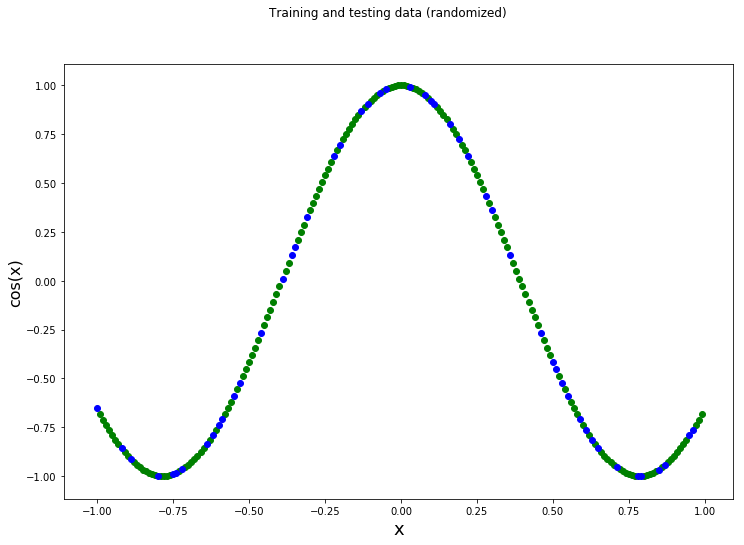

In [5]:
# Shuffle the dataset to make the training and testing sets more evenly distributed
random.shuffle(dataset)

# Redo the split
# Split into training and testing sets
training_dataset = dataset[:150]
testing_dataset = dataset[-50:]
# Training inputs
x_training = list(item[0] for item in training_dataset)
# Training outputs
y_training = list(item[1] for item in training_dataset)
# Testing inputs
x_testing = list(item[0] for item in testing_dataset)
# Testing outputs
y_testing = list(item[1] for item in testing_dataset)

# Normalize X values
for i in range(len(x_training)):
    x_training[i] = x_training[i] / (200*increment - 100*increment)

for i in range(len(x_testing)):
    x_testing[i] = x_testing[i] / (200*increment - 100*increment)


# Plot training and testing datasets
fig = plt.figure(figsize=(12, 8))
fig.suptitle('Training and testing data (randomized)')
plt.scatter(x_training, y_training, color='green')
plt.scatter(x_testing, y_testing, color='blue')
plt.xlabel('x', fontsize=18)
plt.ylabel('cos(x)', fontsize=16)
plt.show()


In [6]:
# Create our model. Sequential means that we will gradually add things to our model, from input to output.
model = Sequential()

# We need to add our hidden layer. Like before, we use RELU and have only one input. 
# Dense is a type neural network layer that is fully connected to the inputs.
# Note that the input layer is implicitly created.
model.add(Dense(units=20, activation='relu', input_dim=1))

# Then we create our output layer. It uses linear activitation like before.
model.add(Dense(units=1, activation='linear'))

# With all layers in place, Keras will compile the model and make it ready for use.
# We will use a stochastic gradient descent (SGD) optimizer and use mean-squared error (MSE) to 
# measure model quality. Note that the previous tutorial used sum-squared error (SSE).
# They are very similar but Keras does not support SSE.
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
# Here we perform the model training/learning.
model.fit(x_training, y_training, epochs=2000, batch_size=16)

Epoch 1/2000
150/150 [==============================] - 0s 1ms/step - loss: 0.4924 - acc: 0.0000e+00
Epoch 2/2000
150/150 [==============================] - 0s 185us/step - loss: 0.4624 - acc: 0.0000e+00
Epoch 3/2000
150/150 [==============================] - 0s 239us/step - loss: 0.4400 - acc: 0.0000e+00
Epoch 4/2000
150/150 [==============================] - 0s 221us/step - loss: 0.4198 - acc: 0.0000e+00
Epoch 5/2000
150/150 [==============================] - 0s 273us/step - loss: 0.4024 - acc: 0.0000e+00
Epoch 6/2000
150/150 [==============================] - 0s 236us/step - loss: 0.3873 - acc: 0.0000e+00
Epoch 7/2000
150/150 [==============================] - 0s 170us/step - loss: 0.3744 - acc: 0.0000e+00
Epoch 8/2000
150/150 [==============================] - 0s 133us/step - loss: 0.3613 - acc: 0.0000e+00
Epoch 9/2000
150/150 [==============================] - 0s 86us/step - loss: 0.3499 - acc: 0.0000e+00
Epoch 10/2000
150/150 [==============================] - 0s 85us/step - loss

150/150 [==============================] - 0s 199us/step - loss: 0.0539 - acc: 0.0067
Epoch 82/2000
150/150 [==============================] - 0s 158us/step - loss: 0.0538 - acc: 0.0067
Epoch 83/2000
150/150 [==============================] - 0s 90us/step - loss: 0.0538 - acc: 0.0067
Epoch 84/2000
150/150 [==============================] - 0s 179us/step - loss: 0.0536 - acc: 0.0067
Epoch 85/2000
150/150 [==============================] - 0s 270us/step - loss: 0.0533 - acc: 0.0067
Epoch 86/2000
150/150 [==============================] - 0s 144us/step - loss: 0.0530 - acc: 0.0067
Epoch 87/2000
150/150 [==============================] - 0s 117us/step - loss: 0.0540 - acc: 0.0067
Epoch 88/2000
150/150 [==============================] - 0s 224us/step - loss: 0.0531 - acc: 0.0067
Epoch 89/2000
150/150 [==============================] - 0s 280us/step - loss: 0.0529 - acc: 0.0067
Epoch 90/2000
150/150 [==============================] - 0s 198us/step - loss: 0.0528 - acc: 0.0067
Epoch 91/2000
1

150/150 [==============================] - 0s 115us/step - loss: 0.0486 - acc: 0.0067
Epoch 163/2000
150/150 [==============================] - 0s 128us/step - loss: 0.0486 - acc: 0.0067
Epoch 164/2000
150/150 [==============================] - 0s 98us/step - loss: 0.0487 - acc: 0.0067
Epoch 165/2000
150/150 [==============================] - 0s 187us/step - loss: 0.0482 - acc: 0.0067
Epoch 166/2000
150/150 [==============================] - 0s 406us/step - loss: 0.0481 - acc: 0.0067
Epoch 167/2000
150/150 [==============================] - 0s 254us/step - loss: 0.0482 - acc: 0.0067
Epoch 168/2000
150/150 [==============================] - 0s 302us/step - loss: 0.0480 - acc: 0.0067
Epoch 169/2000
150/150 [==============================] - 0s 251us/step - loss: 0.0481 - acc: 0.0067
Epoch 170/2000
150/150 [==============================] - 0s 182us/step - loss: 0.0481 - acc: 0.0067
Epoch 171/2000
150/150 [==============================] - 0s 209us/step - loss: 0.0478 - acc: 0.0067
Epoch 

150/150 [==============================] - 0s 256us/step - loss: 0.0417 - acc: 0.0067
Epoch 243/2000
150/150 [==============================] - 0s 255us/step - loss: 0.0414 - acc: 0.0067
Epoch 244/2000
150/150 [==============================] - 0s 249us/step - loss: 0.0421 - acc: 0.0067
Epoch 245/2000
150/150 [==============================] - 0s 236us/step - loss: 0.0412 - acc: 0.0067
Epoch 246/2000
150/150 [==============================] - 0s 101us/step - loss: 0.0413 - acc: 0.0067
Epoch 247/2000
150/150 [==============================] - 0s 214us/step - loss: 0.0412 - acc: 0.0067
Epoch 248/2000
150/150 [==============================] - 0s 206us/step - loss: 0.0412 - acc: 0.0067
Epoch 249/2000
150/150 [==============================] - 0s 213us/step - loss: 0.0410 - acc: 0.0067
Epoch 250/2000
150/150 [==============================] - 0s 377us/step - loss: 0.0414 - acc: 0.0067
Epoch 251/2000
150/150 [==============================] - 0s 112us/step - loss: 0.0408 - acc: 0.0067
Epoch

150/150 [==============================] - 0s 203us/step - loss: 0.0350 - acc: 0.0067
Epoch 323/2000
150/150 [==============================] - 0s 147us/step - loss: 0.0351 - acc: 0.0067
Epoch 324/2000
150/150 [==============================] - 0s 90us/step - loss: 0.0349 - acc: 0.0067
Epoch 325/2000
150/150 [==============================] - 0s 208us/step - loss: 0.0353 - acc: 0.0067
Epoch 326/2000
150/150 [==============================] - 0s 242us/step - loss: 0.0347 - acc: 0.0067
Epoch 327/2000
150/150 [==============================] - 0s 186us/step - loss: 0.0349 - acc: 0.0067
Epoch 328/2000
150/150 [==============================] - 0s 143us/step - loss: 0.0349 - acc: 0.0067
Epoch 329/2000
150/150 [==============================] - 0s 115us/step - loss: 0.0351 - acc: 0.0067
Epoch 330/2000
150/150 [==============================] - 0s 299us/step - loss: 0.0344 - acc: 0.0067
Epoch 331/2000
150/150 [==============================] - 0s 152us/step - loss: 0.0344 - acc: 0.0067
Epoch 

150/150 [==============================] - 0s 177us/step - loss: 0.0310 - acc: 0.0067
Epoch 403/2000
150/150 [==============================] - 0s 204us/step - loss: 0.0316 - acc: 0.0067
Epoch 404/2000
150/150 [==============================] - 0s 89us/step - loss: 0.0310 - acc: 0.0067
Epoch 405/2000
150/150 [==============================] - 0s 153us/step - loss: 0.0316 - acc: 0.0067
Epoch 406/2000
150/150 [==============================] - 0s 151us/step - loss: 0.0312 - acc: 0.0067
Epoch 407/2000
150/150 [==============================] - 0s 222us/step - loss: 0.0312 - acc: 0.0067
Epoch 408/2000
150/150 [==============================] - 0s 266us/step - loss: 0.0314 - acc: 0.0067
Epoch 409/2000
150/150 [==============================] - 0s 217us/step - loss: 0.0312 - acc: 0.0067
Epoch 410/2000
150/150 [==============================] - 0s 121us/step - loss: 0.0311 - acc: 0.0067
Epoch 411/2000
150/150 [==============================] - 0s 201us/step - loss: 0.0313 - acc: 0.0067
Epoch 

150/150 [==============================] - 0s 195us/step - loss: 0.0297 - acc: 0.0067
Epoch 483/2000
150/150 [==============================] - 0s 258us/step - loss: 0.0299 - acc: 0.0067
Epoch 484/2000
150/150 [==============================] - 0s 139us/step - loss: 0.0303 - acc: 0.0067
Epoch 485/2000
150/150 [==============================] - 0s 118us/step - loss: 0.0297 - acc: 0.0067
Epoch 486/2000
150/150 [==============================] - 0s 183us/step - loss: 0.0297 - acc: 0.0067
Epoch 487/2000
150/150 [==============================] - 0s 187us/step - loss: 0.0296 - acc: 0.0067
Epoch 488/2000
150/150 [==============================] - 0s 152us/step - loss: 0.0299 - acc: 0.0067
Epoch 489/2000
150/150 [==============================] - 0s 89us/step - loss: 0.0295 - acc: 0.0067
Epoch 490/2000
150/150 [==============================] - 0s 203us/step - loss: 0.0298 - acc: 0.0067
Epoch 491/2000
150/150 [==============================] - 0s 74us/step - loss: 0.0297 - acc: 0.0067
Epoch 4

150/150 [==============================] - 0s 123us/step - loss: 0.0293 - acc: 0.0067
Epoch 564/2000
150/150 [==============================] - 0s 233us/step - loss: 0.0291 - acc: 0.0067
Epoch 565/2000
150/150 [==============================] - 0s 118us/step - loss: 0.0293 - acc: 0.0067
Epoch 566/2000
150/150 [==============================] - 0s 128us/step - loss: 0.0291 - acc: 0.0067
Epoch 567/2000
150/150 [==============================] - 0s 237us/step - loss: 0.0294 - acc: 0.0067
Epoch 568/2000
150/150 [==============================] - 0s 256us/step - loss: 0.0291 - acc: 0.0067
Epoch 569/2000
150/150 [==============================] - 0s 136us/step - loss: 0.0291 - acc: 0.0067
Epoch 570/2000
150/150 [==============================] - 0s 173us/step - loss: 0.0291 - acc: 0.0067
Epoch 571/2000
150/150 [==============================] - 0s 112us/step - loss: 0.0291 - acc: 0.0067
Epoch 572/2000
150/150 [==============================] - 0s 205us/step - loss: 0.0294 - acc: 0.0067
Epoch

150/150 [==============================] - 0s 87us/step - loss: 0.0289 - acc: 0.0067
Epoch 644/2000
150/150 [==============================] - 0s 174us/step - loss: 0.0291 - acc: 0.0067
Epoch 645/2000
150/150 [==============================] - 0s 105us/step - loss: 0.0289 - acc: 0.0067
Epoch 646/2000
150/150 [==============================] - 0s 98us/step - loss: 0.0287 - acc: 0.0067
Epoch 647/2000
150/150 [==============================] - 0s 99us/step - loss: 0.0288 - acc: 0.0067
Epoch 648/2000
150/150 [==============================] - 0s 233us/step - loss: 0.0289 - acc: 0.0067
Epoch 649/2000
150/150 [==============================] - 0s 152us/step - loss: 0.0291 - acc: 0.0067
Epoch 650/2000
150/150 [==============================] - 0s 229us/step - loss: 0.0288 - acc: 0.0067
Epoch 651/2000
150/150 [==============================] - 0s 229us/step - loss: 0.0288 - acc: 0.0067
Epoch 652/2000
150/150 [==============================] - 0s 102us/step - loss: 0.0292 - acc: 0.0067
Epoch 65

Epoch 724/2000
150/150 [==============================] - 0s 433us/step - loss: 0.0290 - acc: 0.0067
Epoch 725/2000
150/150 [==============================] - 0s 140us/step - loss: 0.0288 - acc: 0.0067
Epoch 726/2000
150/150 [==============================] - 0s 152us/step - loss: 0.0290 - acc: 0.0067
Epoch 727/2000
150/150 [==============================] - 0s 107us/step - loss: 0.0287 - acc: 0.0067
Epoch 728/2000
150/150 [==============================] - 0s 76us/step - loss: 0.0287 - acc: 0.0067
Epoch 729/2000
150/150 [==============================] - 0s 132us/step - loss: 0.0290 - acc: 0.0067
Epoch 730/2000
150/150 [==============================] - 0s 90us/step - loss: 0.0287 - acc: 0.0067
Epoch 731/2000
150/150 [==============================] - 0s 91us/step - loss: 0.0287 - acc: 0.0067
Epoch 732/2000
150/150 [==============================] - 0s 88us/step - loss: 0.0290 - acc: 0.0067
Epoch 733/2000
150/150 [==============================] - 0s 127us/step - loss: 0.0292 - acc: 0

150/150 [==============================] - 0s 106us/step - loss: 0.0288 - acc: 0.0067
Epoch 805/2000
150/150 [==============================] - 0s 146us/step - loss: 0.0287 - acc: 0.0067
Epoch 806/2000
150/150 [==============================] - 0s 76us/step - loss: 0.0286 - acc: 0.0067
Epoch 807/2000
150/150 [==============================] - 0s 144us/step - loss: 0.0286 - acc: 0.0067
Epoch 808/2000
150/150 [==============================] - 0s 113us/step - loss: 0.0288 - acc: 0.0067
Epoch 809/2000
150/150 [==============================] - 0s 122us/step - loss: 0.0287 - acc: 0.0067
Epoch 810/2000
150/150 [==============================] - 0s 173us/step - loss: 0.0287 - acc: 0.0067
Epoch 811/2000
150/150 [==============================] - 0s 181us/step - loss: 0.0288 - acc: 0.0067
Epoch 812/2000
150/150 [==============================] - 0s 240us/step - loss: 0.0288 - acc: 0.0067
Epoch 813/2000
150/150 [==============================] - 0s 104us/step - loss: 0.0288 - acc: 0.0067
Epoch 

150/150 [==============================] - 0s 98us/step - loss: 0.0288 - acc: 0.0067
Epoch 885/2000
150/150 [==============================] - 0s 177us/step - loss: 0.0288 - acc: 0.0067
Epoch 886/2000
150/150 [==============================] - 0s 90us/step - loss: 0.0289 - acc: 0.0067
Epoch 887/2000
150/150 [==============================] - 0s 100us/step - loss: 0.0287 - acc: 0.0067
Epoch 888/2000
150/150 [==============================] - 0s 107us/step - loss: 0.0286 - acc: 0.0067
Epoch 889/2000
150/150 [==============================] - 0s 280us/step - loss: 0.0286 - acc: 0.0067
Epoch 890/2000
150/150 [==============================] - 0s 133us/step - loss: 0.0286 - acc: 0.0067
Epoch 891/2000
150/150 [==============================] - 0s 140us/step - loss: 0.0286 - acc: 0.0067
Epoch 892/2000
150/150 [==============================] - 0s 255us/step - loss: 0.0289 - acc: 0.0067
Epoch 893/2000
150/150 [==============================] - 0s 237us/step - loss: 0.0286 - acc: 0.0067
Epoch 8

150/150 [==============================] - 0s 138us/step - loss: 0.0290 - acc: 0.0067
Epoch 966/2000
150/150 [==============================] - 0s 95us/step - loss: 0.0289 - acc: 0.0067
Epoch 967/2000
150/150 [==============================] - 0s 101us/step - loss: 0.0287 - acc: 0.0067
Epoch 968/2000
150/150 [==============================] - 0s 100us/step - loss: 0.0286 - acc: 0.0067
Epoch 969/2000
150/150 [==============================] - 0s 81us/step - loss: 0.0289 - acc: 0.0067
Epoch 970/2000
150/150 [==============================] - 0s 70us/step - loss: 0.0287 - acc: 0.0067
Epoch 971/2000
150/150 [==============================] - 0s 91us/step - loss: 0.0290 - acc: 0.0067
Epoch 972/2000
150/150 [==============================] - 0s 95us/step - loss: 0.0286 - acc: 0.0067
Epoch 973/2000
150/150 [==============================] - 0s 106us/step - loss: 0.0286 - acc: 0.0067
Epoch 974/2000
150/150 [==============================] - 0s 75us/step - loss: 0.0286 - acc: 0.0067
Epoch 975/2

150/150 [==============================] - 0s 108us/step - loss: 0.0286 - acc: 0.0067
Epoch 1046/2000
150/150 [==============================] - 0s 206us/step - loss: 0.0285 - acc: 0.0067
Epoch 1047/2000
150/150 [==============================] - 0s 150us/step - loss: 0.0285 - acc: 0.0067
Epoch 1048/2000
150/150 [==============================] - 0s 326us/step - loss: 0.0288 - acc: 0.0067
Epoch 1049/2000
150/150 [==============================] - 0s 225us/step - loss: 0.0288 - acc: 0.0067
Epoch 1050/2000
150/150 [==============================] - 0s 186us/step - loss: 0.0290 - acc: 0.0067
Epoch 1051/2000
150/150 [==============================] - 0s 110us/step - loss: 0.0286 - acc: 0.0067
Epoch 1052/2000
150/150 [==============================] - 0s 136us/step - loss: 0.0286 - acc: 0.0067
Epoch 1053/2000
150/150 [==============================] - 0s 231us/step - loss: 0.0286 - acc: 0.0067
Epoch 1054/2000
150/150 [==============================] - 0s 236us/step - loss: 0.0287 - acc: 0.0

150/150 [==============================] - 0s 179us/step - loss: 0.0297 - acc: 0.0067
Epoch 1126/2000
150/150 [==============================] - 0s 194us/step - loss: 0.0287 - acc: 0.0067
Epoch 1127/2000
150/150 [==============================] - 0s 94us/step - loss: 0.0289 - acc: 0.0067
Epoch 1128/2000
150/150 [==============================] - 0s 98us/step - loss: 0.0285 - acc: 0.0067
Epoch 1129/2000
150/150 [==============================] - 0s 238us/step - loss: 0.0286 - acc: 0.0067
Epoch 1130/2000
150/150 [==============================] - 0s 259us/step - loss: 0.0286 - acc: 0.0067
Epoch 1131/2000
150/150 [==============================] - 0s 97us/step - loss: 0.0286 - acc: 0.0067
Epoch 1132/2000
150/150 [==============================] - 0s 145us/step - loss: 0.0286 - acc: 0.0067
Epoch 1133/2000
150/150 [==============================] - 0s 244us/step - loss: 0.0287 - acc: 0.0067
Epoch 1134/2000
150/150 [==============================] - 0s 257us/step - loss: 0.0286 - acc: 0.0067

150/150 [==============================] - 0s 148us/step - loss: 0.0288 - acc: 0.0067
Epoch 1206/2000
150/150 [==============================] - 0s 351us/step - loss: 0.0288 - acc: 0.0067
Epoch 1207/2000
150/150 [==============================] - 0s 242us/step - loss: 0.0286 - acc: 0.0067
Epoch 1208/2000
150/150 [==============================] - 0s 87us/step - loss: 0.0287 - acc: 0.0067
Epoch 1209/2000
150/150 [==============================] - 0s 147us/step - loss: 0.0286 - acc: 0.0067
Epoch 1210/2000
150/150 [==============================] - 0s 78us/step - loss: 0.0286 - acc: 0.0067
Epoch 1211/2000
150/150 [==============================] - 0s 140us/step - loss: 0.0291 - acc: 0.0067
Epoch 1212/2000
150/150 [==============================] - 0s 74us/step - loss: 0.0287 - acc: 0.0067
Epoch 1213/2000
150/150 [==============================] - 0s 110us/step - loss: 0.0286 - acc: 0.0067
Epoch 1214/2000
150/150 [==============================] - 0s 112us/step - loss: 0.0287 - acc: 0.0067

150/150 [==============================] - 0s 222us/step - loss: 0.0289 - acc: 0.0067
Epoch 1286/2000
150/150 [==============================] - 0s 159us/step - loss: 0.0287 - acc: 0.0067
Epoch 1287/2000
150/150 [==============================] - 0s 124us/step - loss: 0.0286 - acc: 0.0067
Epoch 1288/2000
150/150 [==============================] - 0s 254us/step - loss: 0.0289 - acc: 0.0067
Epoch 1289/2000
150/150 [==============================] - 0s 236us/step - loss: 0.0288 - acc: 0.0067
Epoch 1290/2000
150/150 [==============================] - 0s 119us/step - loss: 0.0288 - acc: 0.0067
Epoch 1291/2000
150/150 [==============================] - 0s 113us/step - loss: 0.0286 - acc: 0.0067
Epoch 1292/2000
150/150 [==============================] - 0s 259us/step - loss: 0.0287 - acc: 0.0067
Epoch 1293/2000
150/150 [==============================] - 0s 295us/step - loss: 0.0286 - acc: 0.0067
Epoch 1294/2000
150/150 [==============================] - 0s 107us/step - loss: 0.0286 - acc: 0.0

150/150 [==============================] - 0s 254us/step - loss: 0.0286 - acc: 0.0067
Epoch 1365/2000
150/150 [==============================] - 0s 141us/step - loss: 0.0285 - acc: 0.0067
Epoch 1366/2000
150/150 [==============================] - 0s 132us/step - loss: 0.0286 - acc: 0.0067
Epoch 1367/2000
150/150 [==============================] - 0s 176us/step - loss: 0.0291 - acc: 0.0067
Epoch 1368/2000
150/150 [==============================] - 0s 231us/step - loss: 0.0288 - acc: 0.0067
Epoch 1369/2000
150/150 [==============================] - 0s 110us/step - loss: 0.0286 - acc: 0.0067
Epoch 1370/2000
150/150 [==============================] - 0s 190us/step - loss: 0.0288 - acc: 0.0067
Epoch 1371/2000
150/150 [==============================] - 0s 217us/step - loss: 0.0284 - acc: 0.0067
Epoch 1372/2000
150/150 [==============================] - 0s 156us/step - loss: 0.0287 - acc: 0.0067
Epoch 1373/2000
150/150 [==============================] - 0s 84us/step - loss: 0.0289 - acc: 0.00

150/150 [==============================] - 0s 115us/step - loss: 0.0288 - acc: 0.0067
Epoch 1445/2000
150/150 [==============================] - 0s 97us/step - loss: 0.0286 - acc: 0.0067
Epoch 1446/2000
150/150 [==============================] - 0s 143us/step - loss: 0.0288 - acc: 0.0067
Epoch 1447/2000
150/150 [==============================] - 0s 213us/step - loss: 0.0286 - acc: 0.0067
Epoch 1448/2000
150/150 [==============================] - 0s 176us/step - loss: 0.0287 - acc: 0.0067
Epoch 1449/2000
150/150 [==============================] - 0s 180us/step - loss: 0.0288 - acc: 0.0067
Epoch 1450/2000
150/150 [==============================] - 0s 86us/step - loss: 0.0284 - acc: 0.0067
Epoch 1451/2000
150/150 [==============================] - 0s 105us/step - loss: 0.0286 - acc: 0.0067
Epoch 1452/2000
150/150 [==============================] - 0s 215us/step - loss: 0.0287 - acc: 0.0067
Epoch 1453/2000
150/150 [==============================] - 0s 181us/step - loss: 0.0287 - acc: 0.006

150/150 [==============================] - 0s 146us/step - loss: 0.0289 - acc: 0.0067
Epoch 1525/2000
150/150 [==============================] - 0s 201us/step - loss: 0.0286 - acc: 0.0067
Epoch 1526/2000
150/150 [==============================] - 0s 530us/step - loss: 0.0286 - acc: 0.0067
Epoch 1527/2000
150/150 [==============================] - 0s 214us/step - loss: 0.0285 - acc: 0.0067
Epoch 1528/2000
150/150 [==============================] - 0s 108us/step - loss: 0.0287 - acc: 0.0067
Epoch 1529/2000
150/150 [==============================] - 0s 88us/step - loss: 0.0287 - acc: 0.0067
Epoch 1530/2000
150/150 [==============================] - 0s 126us/step - loss: 0.0286 - acc: 0.0067
Epoch 1531/2000
150/150 [==============================] - 0s 563us/step - loss: 0.0288 - acc: 0.0067
Epoch 1532/2000
150/150 [==============================] - 0s 176us/step - loss: 0.0285 - acc: 0.0067
Epoch 1533/2000
150/150 [==============================] - 0s 407us/step - loss: 0.0286 - acc: 0.00

150/150 [==============================] - 0s 113us/step - loss: 0.0290 - acc: 0.0067
Epoch 1605/2000
150/150 [==============================] - 0s 189us/step - loss: 0.0287 - acc: 0.0067
Epoch 1606/2000
150/150 [==============================] - 0s 102us/step - loss: 0.0288 - acc: 0.0067
Epoch 1607/2000
150/150 [==============================] - 0s 81us/step - loss: 0.0290 - acc: 0.0067
Epoch 1608/2000
150/150 [==============================] - 0s 266us/step - loss: 0.0287 - acc: 0.0067
Epoch 1609/2000
150/150 [==============================] - 0s 131us/step - loss: 0.0286 - acc: 0.0067
Epoch 1610/2000
150/150 [==============================] - ETA: 0s - loss: 0.0142 - acc: 0.0000e+0 - 0s 300us/step - loss: 0.0286 - acc: 0.0067
Epoch 1611/2000
150/150 [==============================] - 0s 158us/step - loss: 0.0287 - acc: 0.0067
Epoch 1612/2000
150/150 [==============================] - 0s 165us/step - loss: 0.0288 - acc: 0.0067
Epoch 1613/2000
150/150 [==============================] 

150/150 [==============================] - 0s 216us/step - loss: 0.0286 - acc: 0.0067
Epoch 1685/2000
150/150 [==============================] - 0s 117us/step - loss: 0.0286 - acc: 0.0067
Epoch 1686/2000
150/150 [==============================] - 0s 191us/step - loss: 0.0287 - acc: 0.0067
Epoch 1687/2000
150/150 [==============================] - 0s 149us/step - loss: 0.0286 - acc: 0.0067
Epoch 1688/2000
150/150 [==============================] - 0s 223us/step - loss: 0.0287 - acc: 0.0067
Epoch 1689/2000
150/150 [==============================] - 0s 209us/step - loss: 0.0288 - acc: 0.0067
Epoch 1690/2000
150/150 [==============================] - 0s 106us/step - loss: 0.0285 - acc: 0.0067
Epoch 1691/2000
150/150 [==============================] - 0s 238us/step - loss: 0.0287 - acc: 0.0067
Epoch 1692/2000
150/150 [==============================] - 0s 328us/step - loss: 0.0286 - acc: 0.0067
Epoch 1693/2000
150/150 [==============================] - 0s 204us/step - loss: 0.0288 - acc: 0.0

150/150 [==============================] - 0s 229us/step - loss: 0.0286 - acc: 0.0067
Epoch 1765/2000
150/150 [==============================] - 0s 229us/step - loss: 0.0286 - acc: 0.0067
Epoch 1766/2000
150/150 [==============================] - 0s 249us/step - loss: 0.0286 - acc: 0.0067
Epoch 1767/2000
150/150 [==============================] - 0s 84us/step - loss: 0.0285 - acc: 0.0067
Epoch 1768/2000
150/150 [==============================] - 0s 241us/step - loss: 0.0288 - acc: 0.0067
Epoch 1769/2000
150/150 [==============================] - 0s 244us/step - loss: 0.0286 - acc: 0.0067
Epoch 1770/2000
150/150 [==============================] - 0s 179us/step - loss: 0.0285 - acc: 0.0067
Epoch 1771/2000
150/150 [==============================] - 0s 135us/step - loss: 0.0287 - acc: 0.0067
Epoch 1772/2000
150/150 [==============================] - 0s 219us/step - loss: 0.0286 - acc: 0.0067
Epoch 1773/2000
150/150 [==============================] - 0s 357us/step - loss: 0.0285 - acc: 0.00

Epoch 1844/2000
150/150 [==============================] - 0s 178us/step - loss: 0.0287 - acc: 0.0067
Epoch 1845/2000
150/150 [==============================] - 0s 101us/step - loss: 0.0290 - acc: 0.0067
Epoch 1846/2000
150/150 [==============================] - 0s 169us/step - loss: 0.0286 - acc: 0.0067
Epoch 1847/2000
150/150 [==============================] - 0s 144us/step - loss: 0.0290 - acc: 0.0067
Epoch 1848/2000
150/150 [==============================] - 0s 426us/step - loss: 0.0287 - acc: 0.0067
Epoch 1849/2000
150/150 [==============================] - 0s 220us/step - loss: 0.0290 - acc: 0.0067
Epoch 1850/2000
150/150 [==============================] - 0s 310us/step - loss: 0.0285 - acc: 0.0067
Epoch 1851/2000
150/150 [==============================] - 0s 210us/step - loss: 0.0288 - acc: 0.0067
Epoch 1852/2000
150/150 [==============================] - 0s 181us/step - loss: 0.0288 - acc: 0.0067
Epoch 1853/2000
150/150 [==============================] - 0s 177us/step - loss: 0

150/150 [==============================] - 0s 332us/step - loss: 0.0287 - acc: 0.0067
Epoch 1925/2000
150/150 [==============================] - 0s 215us/step - loss: 0.0290 - acc: 0.0067
Epoch 1926/2000
150/150 [==============================] - 0s 176us/step - loss: 0.0287 - acc: 0.0067
Epoch 1927/2000
150/150 [==============================] - 0s 181us/step - loss: 0.0288 - acc: 0.0067
Epoch 1928/2000
150/150 [==============================] - 0s 525us/step - loss: 0.0285 - acc: 0.0067
Epoch 1929/2000
150/150 [==============================] - 0s 404us/step - loss: 0.0288 - acc: 0.0067
Epoch 1930/2000
150/150 [==============================] - 0s 486us/step - loss: 0.0286 - acc: 0.0067
Epoch 1931/2000
150/150 [==============================] - 0s 102us/step - loss: 0.0289 - acc: 0.0067
Epoch 1932/2000
150/150 [==============================] - 0s 190us/step - loss: 0.0288 - acc: 0.0067
Epoch 1933/2000
150/150 [==============================] - 0s 142us/step - loss: 0.0289 - acc: 0.0

In [8]:
# Now lets apply the trained model to the both training and testing data.
y_training_results = model.predict(x_training)
y_testing_results = model.predict(x_testing)

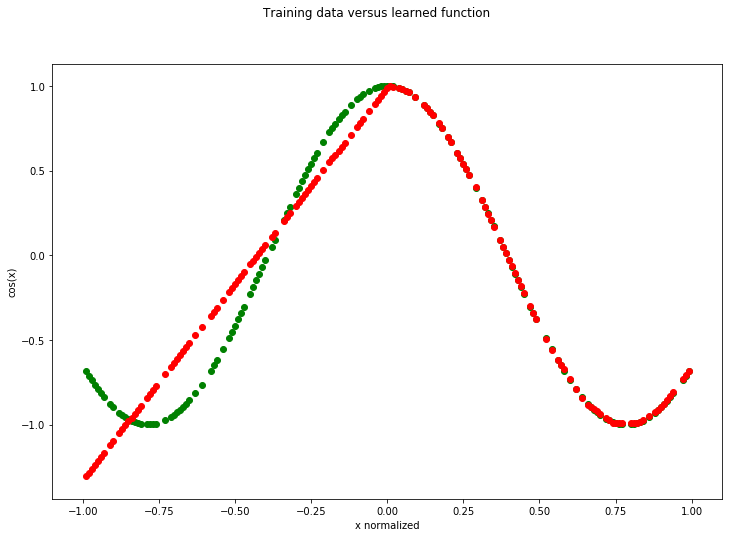

In [9]:
# Plot function currently learned
fig = plt.figure(figsize=(12, 8))
plt.scatter(x_training, y_training, color='green')
plt.scatter(x_training, y_training_results, color='red')
fig.suptitle('Training data versus learned function')
plt.ylabel('cos(x)')
plt.xlabel('x normalized')
plt.show()

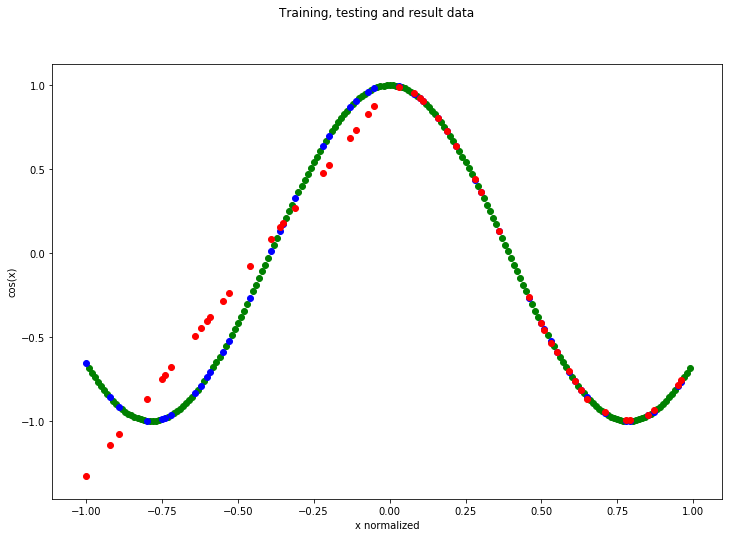

In [10]:
# Plot results vs "ground truth"# Plot re 
fig = plt.figure(figsize=(12, 8))
plt.scatter(x_training, y_training, color='green')
plt.scatter(x_testing, y_testing, color='blue')
plt.scatter(x_testing, y_testing_results, color='red')
fig.suptitle('Training, testing and result data')
plt.ylabel('cos(x)')
plt.xlabel('x normalized')
plt.show()